<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Integrantes Rakim y Ken-Y ft. Don Omar
- Rodrigo Cayazaya
- Ethiel Carmona
- Jean-Franco Zárate

Link al video: https://drive.google.com/file/d/1g7dJy3Hn7oEJK6VzyjqE5znoFoEtfZgr/view?usp=sharing

# Declaración de honestidad
El trabajo realizado es original y desarrollado por el equipo, producido mediante la conversación y ayuda mutua del equipo, en conformidad con el código de honor de la universidad.

# Contribución
- Rodrigo Cayazaya: Preprocesamiento y entrenamiento de modelos
- Ethiel Carmona: Preprocesamiento y entrenamiento de modelos
- Jean-Franco Zárate: Preprocesamiento, y entrenamiento de modelos

# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

#Desafío Kaggle 

Se denomina microbiota humana al conjunto de comunidades microbianas (bacterias, hongos, arqueas, virus y parásitos) que residen en nuestro cuerpo manteniendo una relación simbiótica y mutualista con nuestras células eucariotas. La más conocida de todas es aquella asociada al aparato digestivo (comúnmente llamada ``flora intestinal''), donde la densidad y diversidad de microorganismos es la mayor que hay en nuestro organismo.

A medida que nuestro conocimiento sobre la microbiota progresa, resulta cada vez más claro que estos ecosistemas tienen un rol fundamental en el correcto funcionamiento del organismo, desarrollando funciones homeostáticas que condicionan nuestra salud. Por ejemplo, se ha demostrado que la microbiota tiene un rol clave en la aparición de enfermedades como la diabetes tipo 2 y la obesidad. También se ha documentado ampliamente su rol en la formación de algunos cánceres y la respectiva respuesta del organismo al tratamiento. Más recientemente, la conexión de la microbiota intestinal con el sistema nervioso central (a través del nervio vago) también ha permitido relacionarla con trastornos como el autismo, la ansiedad, la depresión y la dependencia alcohólica.

Todo lo anterior sugiere que la composición de la microbiota podría ser utilizada predictor de diferentes enfermedades. La introducción de las técnicas de secuenciación masiva del ADN ha supuesto una verdadera revolución en esta linea de investigación, permitiendo obtener los perfiles de composición de una comunidad microbial con altísima resolución. Desafortundamente, el uso de estos datos para descubrir biomarcadores y predecir enfermedades está lejos de ser sencillo en buena parte por el altísimo número de predictores posibles (d) y el reducido número de muestras (n) de los que suele disponerse en un estudio clínico.

## Objetivo

El objetivo de este taller consiste en desarrollar modelos que permitan lidiar con este problema $(n << d)$ usando datos reales relacionados con 3 enfermedades: obesidad, diabetes tipo 2 y cirrosis.

Link: https://www.kaggle.com/c/simbiontes



# Import de librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [ ]:
!wget www.inf.utfsm.cl/~jnancu/biomedata_test_abundance.csv  
!wget www.inf.utfsm.cl/~jnancu/biomedata_train_abundance.csv 
!wget www.inf.utfsm.cl/~jnancu/biomedata_test_marker.csv 
!wget www.inf.utfsm.cl/~jnancu/biomedata_train_marker.csv

URL transformed to HTTPS due to an HSTS policy
--2021-12-23 04:04:28--  https://www.inf.utfsm.cl/~jnancu/biomedata_test_abundance.csv
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481094 (470K) [application/octet-stream]
Saving to: ‘biomedata_test_abundance.csv.1’

biomedata_test_abun 100%[===================>] 469.82K   820KB/s    in 0.6s    

2021-12-23 04:04:29 (820 KB/s) - ‘biomedata_test_abundance.csv.1’ saved [481094/481094]

URL transformed to HTTPS due to an HSTS policy
--2021-12-23 04:04:29--  https://www.inf.utfsm.cl/~jnancu/biomedata_train_abundance.csv
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1263402 (1.2M) [application/octet-stream]
Saving 

# Carga de datos

In [ ]:
data_abundance_test = pd.read_csv("biomedata_test_abundance.csv")
data_marker_test = pd.read_csv("biomedata_test_marker.csv")
data_abundance_train = pd.read_csv("biomedata_train_abundance.csv")
data_marker_train = pd.read_csv("biomedata_train_marker.csv")

In [ ]:
data_abundance_train.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifid

In [ ]:
data_abundance_test.head()

,Unnamed: 0,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium

In [ ]:
data_marker_train.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,gi|103485498|ref|NC_008048.1|:c103928-103680,gi|104773257|ref|NC_008054.1|:116729-117526,gi|104773257|ref|NC_008054.1|:1737697-1738332,gi|104773257|ref|NC_008054.1|:266275-267207,gi|104773257|ref|NC_008054.1|:294312-294563,gi|104773257|ref|NC_008054.1|:444407-444904,gi|104773257|ref|NC_008054.1|:54492-55274,gi|104773257|ref|NC_008054.1|:621607-622221,gi|104773257|ref|NC_008054.1|:794401-794844,gi|104773257|ref|NC_008054.1|:817772-818014,gi|104773257|ref|NC_008054.1|:839090-839893,gi|104773257|ref|NC_008054.1|:c1060211-1059462,gi|104773257|ref|NC_008054.1|:c1071276-1070581,gi|104773257|ref|NC_008054.1|:c1156068-1154920,gi|104773257|ref|NC_008054.1|:c1169983-1168085,gi|104773257|ref|NC_008054.1|:c1327487-1326282,gi|104773257|ref|NC_008054.1|:c1364348-1363743,gi|104773257|ref|NC_008054.1|:c1365657-1365112,gi|104773257|ref|NC_008054.1|:c1753212-1752712,gi|104773257|ref|NC_008054.1|:c425086-424721,gi|104773257|ref|NC_008054.1|:c492752-492150,gi|104773257|ref|NC_008054.1|:c853536-852661,gi|104773257|ref|NC_008054.1|:c869798-868797,gi|104773257|ref|NC_008054.1|:c993834-993223,gi|107770669|ref|NM_001040789.1|,gi|107868482|ref|NM_001040955.1|,gi|110636427|ref|NC_008255.1|:1928766-1929113,gi|110636427|ref|NC_008255.1|:2007555-2008244,gi|110636427|ref|NC_008255.1|:2144911-2145189,gi|110636427|ref|NC_008255.1|:3074386-3076455,gi|110636427|ref|NC_008255.1|:4237317-4238054,gi|110636427|ref|NC_008255.1|:4323479-4324639,gi|110636427|ref|NC_008255.1|:c2184296-2183436,gi|110636427|ref|NC_008255.1|:c3586657-3586250,gi|110798562|ref|NC_008261.1|:121034-121474,...,gi|85372828|ref|NC_007722.1|:3001224-3001502,gi|85372828|ref|NC_007722.1|:3001535-3002416,gi|85372828|ref|NC_007722.1|:3006368-3006781,gi|85372828|ref|NC_007722.1|:3017209-3018381,gi|85372828|ref|NC_007722.1|:3018378-3018854,gi|85372828|ref|NC_007722.1|:3018861-3020111,gi|85372828|ref|NC_007722.1|:3034108-3034953,gi|85372828|ref|NC_007722.1|:827855-828763,gi|85372828|ref|NC_007722.1|:840955-841395,gi|85372828|ref|NC_007722.1|:842620-842883,gi|85372828|ref|NC_007722.1|:c1678750-1678445,gi|85372828|ref|NC_007722.1|:c2962716-2962081,gi|85372828|ref|NC_007722.1|:c2990559-2990038,gi|85372828|ref|NC_007722.1|:c2995293-2994421,gi|85372828|ref|NC_007722.1|:c2996606-2995290,gi|85372828|ref|NC_007722.1|:c2997421-2996606,gi|85372828|ref|NC_007722.1|:c3001138-3000908,gi|85372828|ref|NC_007722.1|:c3004141-3002555,gi|85372828|ref|NC_007722.1|:c3010113-3007429,gi|85372828|ref|NC_007722.1|:c894924-893911,gi|85707569|ref|NZ_AAMW01000001.1|:666073-666492,gi|85707569|ref|NZ_AAMW01000001.1|:c1251042-1250533,gi|85713430|ref|NZ_AAMY01000001.1|:181620-182330,gi|86747127|ref|NC_007778.1|:c120924-120565,gi|87122966|ref|NZ_AANE01000039.1|:8596-9090,gi|88607955|ref|NC_007798.1|:118090-119082,gi|88657561|ref|NC_007799.1|:c987429-987058,gi|88797415|ref|NZ_AAOE01000002.1|:c235147-234506,gi|89890966|ref|NZ_AAPD01000004.1|:c130582-129296,gi|89892746|ref|NC_007907.1|:5171129-5171617,gi|89892746|ref|NC_007907.1|:c3938880-3937900,gi|90581188|ref|NZ_AAOJ01000014.1|:76701-76972,gi|91774356|ref|NC_007947.1|:c416906-416292,gi|92112136|ref|NC_007963.1|:485202-485741,gi|92115633|ref|NC_007964.1|:c3043219-3042695,gi|93004831|ref|NC_007969.1|:1110067-1110642,gi|93004831|ref|NC_007969.1|:1986617-1987513,gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444,gi|94676460|ref|NC_007984.1|:c601098-600646,gi|94991497|ref|NC_008023.1|:148294-148941
0,0,1.0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
data_marker_test.head()

,Unnamed: 0,code_study,country,gender,gi|103485498|ref|NC_008048.1|:c103928-103680,gi|104773257|ref|NC_008054.1|:116729-117526,gi|104773257|ref|NC_008054.1|:1737697-1738332,gi|104773257|ref|NC_008054.1|:266275-267207,gi|104773257|ref|NC_008054.1|:294312-294563,gi|104773257|ref|NC_008054.1|:444407-444904,gi|104773257|ref|NC_008054.1|:54492-55274,gi|104773257|ref|NC_008054.1|:621607-622221,gi|104773257|ref|NC_008054.1|:794401-794844,gi|104773257|ref|NC_008054.1|:817772-818014,gi|104773257|ref|NC_008054.1|:839090-839893,gi|104773257|ref|NC_008054.1|:c1060211-1059462,gi|104773257|ref|NC_008054.1|:c1071276-1070581,gi|104773257|ref|NC_008054.1|:c1156068-1154920,gi|104773257|ref|NC_008054.1|:c1169983-1168085,gi|104773257|ref|NC_008054.1|:c1327487-1326282,gi|104773257|ref|NC_008054.1|:c1364348-1363743,gi|104773257|ref|NC_008054.1|:c1365657-1365112,gi|104773257|ref|NC_008054.1|:c1753212-1752712,gi|104773257|ref|NC_008054.1|:c425086-424721,gi|104773257|ref|NC_008054.1|:c492752-492150,gi|104773257|ref|NC_008054.1|:c853536-852661,gi|104773257|ref|NC_008054.1|:c869798-868797,gi|104773257|ref|NC_008054.1|:c993834-993223,gi|107770669|ref|NM_001040789.1|,gi|107868482|ref|NM_001040955.1|,gi|110636427|ref|NC_008255.1|:1928766-1929113,gi|110636427|ref|NC_008255.1|:2007555-2008244,gi|110636427|ref|NC_008255.1|:2144911-2145189,gi|110636427|ref|NC_008255.1|:3074386-3076455,gi|110636427|ref|NC_008255.1|:4237317-4238054,gi|110636427|ref|NC_008255.1|:4323479-4324639,gi|110636427|ref|NC_008255.1|:c2184296-2183436,gi|110636427|ref|NC_008255.1|:c3586657-3586250,gi|110798562|ref|NC_008261.1|:121034-121474,gi|110798562|ref|NC_008261.1|:1410448-1410915,...,gi|85372828|ref|NC_007722.1|:3001224-3001502,gi|85372828|ref|NC_007722.1|:3001535-3002416,gi|85372828|ref|NC_007722.1|:3006368-3006781,gi|85372828|ref|NC_007722.1|:3017209-3018381,gi|85372828|ref|NC_007722.1|:3018378-3018854,gi|85372828|ref|NC_007722.1|:3018861-3020111,gi|85372828|ref|NC_007722.1|:3034108-3034953,gi|85372828|ref|NC_007722.1|:827855-828763,gi|85372828|ref|NC_007722.1|:840955-841395,gi|85372828|ref|NC_007722.1|:842620-842883,gi|85372828|ref|NC_007722.1|:c1678750-1678445,gi|85372828|ref|NC_007722.1|:c2962716-2962081,gi|85372828|ref|NC_007722.1|:c2990559-2990038,gi|85372828|ref|NC_007722.1|:c2995293-2994421,gi|85372828|ref|NC_007722.1|:c2996606-2995290,gi|85372828|ref|NC_007722.1|:c2997421-2996606,gi|85372828|ref|NC_007722.1|:c3001138-3000908,gi|85372828|ref|NC_007722.1|:c3004141-3002555,gi|85372828|ref|NC_007722.1|:c3010113-3007429,gi|85372828|ref|NC_007722.1|:c894924-893911,gi|85707569|ref|NZ_AAMW01000001.1|:666073-666492,gi|85707569|ref|NZ_AAMW01000001.1|:c1251042-1250533,gi|85713430|ref|NZ_AAMY01000001.1|:181620-182330,gi|86747127|ref|NC_007778.1|:c120924-120565,gi|87122966|ref|NZ_AANE01000039.1|:8596-9090,gi|88607955|ref|NC_007798.1|:118090-119082,gi|88657561|ref|NC_007799.1|:c987429-987058,gi|88797415|ref|NZ_AAOE01000002.1|:c235147-234506,gi|89890966|ref|NZ_AAPD01000004.1|:c130582-129296,gi|89892746|ref|NC_007907.1|:5171129-5171617,gi|89892746|ref|NC_007907.1|:c3938880-3937900,gi|90581188|ref|NZ_AAOJ01000014.1|:76701-76972,gi|91774356|ref|NC_007947.1|:c416906-416292,gi|92112136|ref|NC_007963.1|:485202-485741,gi|92115633|ref|NC_007964.1|:c3043219-3042695,gi|93004831|ref|NC_007969.1|:1110067-1110642,gi|93004831|ref|NC_007969.1|:1986617-1987513,gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444,gi|94676460|ref|NC_007984.1|:c601098-600646,gi|94991497|ref|NC_008023.1|:148294-148941
0,0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
print("Shapes")
print("Abundance_train shape:", data_abundance_train.shape)
print("Abundance_test shape:", data_abundance_test.shape)
print("-")
print("Marker_train shape:", data_marker_train.shape)
print("Marker_test shape:", data_marker_test.shape)

Shapes
Abundance_train shape: (621, 717)
Abundance_test shape: (208, 714)
-
Marker_train shape: (621, 153953)
Marker_test shape: (208, 153950)


In [ ]:
data_abundance_train[["Cirrhosis", "Obesity", "Diabetes"]].head()

,Cirrhosis,Obesity,Diabetes
0,1.0,NaN,NaN
1,0.0,NaN,NaN
2,0.0,NaN,NaN
3,0.0,NaN,NaN
4,1.0,NaN,NaN


In [ ]:
print("Unique values in target")
print(data_abundance_train["Cirrhosis"].unique())
print(data_abundance_train["Obesity"].unique())
print(data_abundance_train["Diabetes"].unique())

Unique values in target
[ 1.  0. nan]
[nan  1.  0.]
[nan  0.  1.]


# Preprocesamiento

## Campos nulos

In [ ]:
def getDuplicateColumns(df):
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

"""
def drop_intersection(train, test, l_train, l_test):
    for elem_train in l_train:
        if (elem_train in l_test):
            train = train.drop([elem_train], axis=1)
            test = test.drop([elem_train], axis=1)
    return train, test
"""

'\ndef drop_intersection(train, test, l_train, l_test):\n    for elem_train in l_train:\n        if (elem_train in l_test):\n            train = train.drop([elem_train], axis=1)\n            test = test.drop([elem_train], axis=1)\n    return train, test\n'

### Abundance pipelines

In [ ]:
def abundance_pipeline_1(train, test):
    train_aux = train.copy()
    test_aux = test.copy()

    for cols in train:
        if (cols not in ["Cirrhosis", "Obesity", "Diabetes", "code_study", "country", "gender", "Unnamed: 0"]):
            train_aux[cols].fillna(train_aux[cols].mean(), inplace=True)
            test_aux[cols].fillna(test_aux[cols].mean(), inplace=True)
    train_aux = pd.get_dummies(train_aux, columns = ['country','code_study','gender'])
    test_aux = pd.get_dummies(test_aux, columns = ['country','code_study','gender'])
    return train_aux, test_aux

def abundance_pipeline_2(train, test):
    train_aux = train.copy()
    test_aux = test.copy()

    for cols in train:
        if (cols not in ["Cirrhosis", "Obesity", "Diabetes", "code_study", "country", "gender", "Unnamed: 0"]):
            train_aux[cols].fillna(train_aux[cols].median(), inplace=True)
            test_aux[cols].fillna(test_aux[cols].median(), inplace=True)
    train_aux = pd.get_dummies(train_aux, columns = ['country','code_study','gender'])
    test_aux = pd.get_dummies(test_aux, columns = ['country','code_study','gender'])
    return train_aux, test_aux

def abundance_pipeline_3(train, test):
    train_aux = train.copy()
    test_aux = test.copy()

    for cols in train:
        if (cols not in ["Cirrhosis", "Obesity", "Diabetes", "code_study", "country", "gender", "Unnamed: 0"]):
            train_aux[cols].fillna(0, inplace=True)
            test_aux[cols].fillna(0, inplace=True)
    train_aux = pd.get_dummies(train_aux, columns = ['country','code_study','gender'])
    test_aux = pd.get_dummies(test_aux, columns = ['country','code_study','gender'])
    return train_aux, test_aux

In [ ]:
lista_train = getDuplicateColumns(data_abundance_train)
lista_test = getDuplicateColumns(data_abundance_test)

print("Columnas duplicadas")
print("Train:", len(lista_train))
print("Test:", len(lista_test))

for e in lista_train:
    if e in lista_test:
        print("Columna compartida:", e)

Columnas duplicadas
Train: 34
Test: 138


In [ ]:
# Reemplazo de nulos por media
abundance_train_p1, abundance_test_p1 = abundance_pipeline_1(data_abundance_train, data_abundance_test)

In [ ]:
# Reemplazo de nulos por mediana
abundance_train_p2, abundance_test_p2 = abundance_pipeline_2(data_abundance_train, data_abundance_test)

In [ ]:
# Reemplazo nulos por 0's
abundance_train_p3, abundance_test_p3 = abundance_pipeline_3(data_abundance_train, data_abundance_test)

In [ ]:
abundance_train_p1.head()

,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bact

In [ ]:
abundance_train_p2.head()

,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bact

In [ ]:
abundance_train_p3.head()

,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bact

#### Columnas duplicadas entre train y test

In [ ]:
# Media
l_mean_train = getDuplicateColumns(abundance_train_p1)
l_mean_test = getDuplicateColumns(abundance_test_p1)

print("Columnas duplicadas con media")
print("Train:", len(l_mean_train))
print("Test:", len(l_mean_test))

for e in l_mean_train:
    if e in l_mean_test:
        print("Columna compartida:", e)

Columnas duplicadas con media
Train: 39
Test: 145
Columna compartida: code_study_Chatelier_gut_obesity
Columna compartida: gender_-


In [ ]:
# Mediana
l_median_train = getDuplicateColumns(abundance_train_p2)
l_median_test = getDuplicateColumns(abundance_test_p2)

print("Columnas duplicadas con mediana")
print("Train:", len(l_median_train))
print("Test:", len(l_median_test))

for e in l_median_train:
    if e in l_median_test:
        print("Columna compartida:", e)

Columnas duplicadas con mediana
Train: 39
Test: 145
Columna compartida: code_study_Chatelier_gut_obesity
Columna compartida: gender_-


### Target

#### Abundance pipeline 1

In [ ]:
abundance_train_p1["Cirrhosis_0"] = abundance_train_p1['Cirrhosis'].fillna(0)
abundance_train_p1["Cirrhosis_1"] = abundance_train_p1['Cirrhosis'].fillna(1)

abundance_train_p1["Obesity_0"] = abundance_train_p1['Obesity'].fillna(0)
abundance_train_p1["Obesity_1"] = abundance_train_p1['Obesity'].fillna(1)

abundance_train_p1["Diabetes_0"] = abundance_train_p1['Diabetes'].fillna(0)
abundance_train_p1["Diabetes_1"] = abundance_train_p1['Diabetes'].fillna(1)

abundance_train_p1 = abundance_train_p1.drop(["Cirrhosis", "Diabetes", "Obesity"], axis=1)

In [ ]:
abundance_train_p1.head()

,Unnamed: 0,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Ac

#### Abundance pipeline 2

In [ ]:
abundance_train_p2["Cirrhosis_0"] = abundance_train_p2['Cirrhosis'].fillna(0)
abundance_train_p2["Cirrhosis_1"] = abundance_train_p2['Cirrhosis'].fillna(1)

abundance_train_p2["Obesity_0"] = abundance_train_p2['Obesity'].fillna(0)
abundance_train_p2["Obesity_1"] = abundance_train_p2['Obesity'].fillna(1)

abundance_train_p2["Diabetes_0"] = abundance_train_p2['Diabetes'].fillna(0)
abundance_train_p2["Diabetes_1"] = abundance_train_p2['Diabetes'].fillna(1)

abundance_train_p2 = abundance_train_p2.drop(["Cirrhosis", "Diabetes", "Obesity"], axis=1)

In [ ]:
abundance_train_p2.head()

,Unnamed: 0,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Ac

#### Abundance pipeline 3

In [ ]:
abundance_train_p3["Cirrhosis"] = abundance_train_p3['Cirrhosis'].fillna(0)
abundance_train_p3["Obesity"] = abundance_train_p3['Obesity'].fillna(0)
abundance_train_p3["Diabetes"] = abundance_train_p3['Diabetes'].fillna(0)

In [ ]:
abundance_train_p3.head()

,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bact

# Separacion train y target

In [ ]:
abundance_xtrain_p1 = abundance_train_p1.drop(["Cirrhosis_0", "Cirrhosis_1", "Diabetes_0", "Diabetes_1", "Obesity_0", "Obesity_1", "Unnamed: 0"], axis=1)
abundance_ytrain_p1 = abundance_train_p1[["Cirrhosis_0", "Cirrhosis_1", "Diabetes_0", "Diabetes_1", "Obesity_0", "Obesity_1"]]

#abundance_test_p1

In [ ]:
abundance_xtrain_p2 = abundance_train_p2.drop(["Cirrhosis_0", "Cirrhosis_1", "Diabetes_0", "Diabetes_1", "Obesity_0", "Obesity_1", "Unnamed: 0"], axis=1)
abundance_ytrain_p2 = abundance_train_p2[["Cirrhosis_0", "Cirrhosis_1", "Diabetes_0", "Diabetes_1", "Obesity_0", "Obesity_1"]]

#abundance_test_p2

In [ ]:
abundance_xtrain_p3 = abundance_train_p3.drop(["Cirrhosis", "Diabetes", "Obesity", "Unnamed: 0"], axis=1)
abundance_ytrain_p3 = abundance_train_p3[["Cirrhosis", "Diabetes", "Obesity"]]

#abundance_test_p3

In [ ]:
abundance_xtrain_p1.shape

(621, 719)

In [ ]:
abundance_xtrain_p2.shape

(621, 719)

In [ ]:
abundance_xtrain_p3.shape

(621, 719)

## Split en Xtrain, ytrain, Xval, yval

In [ ]:
p1_Xtrain, p1_Xval, p1_ytrain, p1_yval = train_test_split(abundance_xtrain_p1, abundance_ytrain_p1, test_size=0.3, random_state=432)

In [ ]:
p2_Xtrain, p2_Xval, p2_ytrain, p2_yval = train_test_split(abundance_xtrain_p2, abundance_ytrain_p2, test_size=0.3, random_state=432)

In [ ]:
print("Split shapes")
print("p1_Xtrain, p1_Xval, p1_ytrain, p1_yval", p1_Xtrain.shape, p1_Xval.shape, p1_ytrain.shape, p1_yval.shape)
print("p2_Xtrain, p2_Xval, p2_ytrain, p2_yval", p2_Xtrain.shape, p2_Xval.shape, p2_ytrain.shape, p2_yval.shape)

Split shapes
p1_Xtrain, p1_Xval, p1_ytrain, p1_yval (434, 719) (187, 719) (434, 6) (187, 6)
p2_Xtrain, p2_Xval, p2_ytrain, p2_yval (434, 719) (187, 719) (434, 6) (187, 6)


## PCA

In [ ]:
p1_scaler = StandardScaler()
p1_scaler.fit(p1_Xtrain)
p1_Xtrain = p1_scaler.transform(p1_Xtrain)
p1_Xval = p1_scaler.transform(p1_Xval)

In [ ]:
p2_scaler = StandardScaler()
p2_scaler.fit(p2_Xtrain)
p2_Xtrain = p2_scaler.transform(p2_Xtrain)
p2_Xval = p2_scaler.transform(p2_Xval)

### Representatividad de varianza

#### Preprocesamiento con medias (Abundance pipeline 1)

In [ ]:
pca_p1_full = PCA(n_components=p1_Xtrain.shape[0], random_state=432)
pca_p1_full.fit(p1_Xtrain)
pca_transformed_p1_full_xtrain = pca_p1_full.transform(p1_Xtrain)
pca_transformed_p1_full_xval = pca_p1_full.transform(p1_Xval)

In [ ]:
pca_transformed_p1_full_xtrain

array([[ 8.66274626e+00,  8.57791033e+00, -7.32719953e+00, ...,
        -8.77240262e-05, -6.24213622e-05,  5.60662627e-15],
       [ 2.40556576e+00, -3.91147750e+00,  2.52108388e+00, ...,
        -1.01228064e-02, -1.38817250e-02, -1.77635684e-15],
       [ 1.49822327e+00, -4.35690608e+00,  2.87198232e+00, ...,
         1.15350476e-04, -4.07451464e-05, -6.17561557e-15],
       ...,
       [ 3.36136563e+00,  1.06129489e+00, -5.60993205e+00, ...,
        -5.95864884e-05, -2.40028338e-05, -4.71844785e-16],
       [ 3.88794101e+00, -4.70831165e+00,  3.01323246e+00, ...,
        -7.29032908e-06, -1.07096094e-04, -3.85802501e-15],
       [ 1.33675625e+00, -2.19300718e+00, -3.38057137e+00, ...,
        -1.26687880e-05,  1.40694077e-04,  3.88578059e-16]])

In [ ]:
np.cumsum(pca_p1_full.explained_variance_ratio_ * 100)

array([  4.56645802,   8.46569881,  11.61338517,  14.2506111 ,
        16.7542578 ,  19.12645745,  21.44094745,  23.38270813,
        25.03730458,  26.54877681,  27.98715571,  29.30873217,
        30.58201341,  31.78052722,  32.9694546 ,  34.11602021,
        35.22093045,  36.2541186 ,  37.24479752,  38.20128105,
        39.1250048 ,  40.04375247,  40.93529918,  41.79416388,
        42.63934873,  43.47535449,  44.28456021,  45.08315081,
        45.86476772,  46.62957443,  47.37389152,  48.09374056,
        48.76671464,  49.43699937,  50.0862745 ,  50.71900026,
        51.34385114,  51.94234184,  52.53335583,  53.10439376,
        53.66947766,  54.22260509,  54.76726251,  55.3041355 ,
        55.81885422,  56.3194413 ,  56.81237457,  57.30015472,
        57.77815856,  58.25250761,  58.72486771,  59.18870726,
        59.64695008,  60.10188967,  60.55265919,  60.99688195,
        61.43847721,  61.87808918,  62.3026912 ,  62.71976275,
        63.13392027,  63.54250925,  63.94557436,  64.34

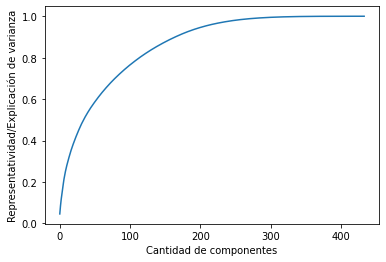

In [ ]:
plt.plot(np.cumsum(pca_p1_full.explained_variance_ratio_))
plt.xlabel("Cantidad de componentes")
plt.ylabel("Representatividad/Explicación de varianza")
plt.show()

#### Preprocesamiento con mediana (Abundance pipeline 2)

In [ ]:
pca_p2_full = PCA(n_components=p2_Xtrain.shape[0], random_state=432)
pca_p2_full.fit(p2_Xtrain)
pca_transformed_p2_full_xtrain = pca_p2_full.transform(p2_Xtrain)
pca_transformed_p2_full_xval = pca_p2_full.transform(p2_Xval)

In [ ]:
pca_transformed_p2_full_xtrain

array([[ 9.69167919e+00, -4.93294740e+00,  5.98238445e-02, ...,
        -9.48361516e-05, -5.71814608e-05,  2.28289609e-15],
       [-7.37730625e-01, -1.82560916e-01, -1.43057777e-01, ...,
        -2.93422526e-03, -1.83180919e-02,  1.65704039e-15],
       [-1.66607656e+00,  9.31231728e-01, -2.34661792e-01, ...,
         1.31540153e-04, -3.48972781e-05, -6.82787160e-15],
       ...,
       [ 7.19121290e-01, -6.89346693e-01, -4.57013038e-01, ...,
        -5.53352679e-05, -3.18280529e-05,  9.35449634e-16],
       [-2.96838539e-02, -1.99265917e+00,  8.52291459e-01, ...,
         2.14937937e-06, -1.02998273e-04, -8.67361738e-16],
       [-1.34237383e+00, -1.21910691e+00, -5.20658143e-01, ...,
        -5.87337434e-05,  1.62384229e-04, -1.33226763e-15]])

In [ ]:
np.cumsum(pca_p2_full.explained_variance_ratio_ * 100)

array([  4.23874598,   7.11095721,   9.91787823,  12.49855107,
        14.99688921,  17.20048475,  19.17790838,  20.84273982,
        22.39107004,  23.90406129,  25.34412879,  26.68932066,
        27.94827461,  29.1991743 ,  30.40362764,  31.58226503,
        32.66229344,  33.70310031,  34.73012987,  35.70001958,
        36.65716378,  37.60609281,  38.51080272,  39.40749922,
        40.30047767,  41.17238269,  42.01146492,  42.84411749,
        43.64976619,  44.44610325,  45.21169314,  45.93209708,
        46.6350037 ,  47.32726937,  47.98904256,  48.64468597,
        49.26764335,  49.88064612,  50.48538474,  51.08245112,
        51.66249327,  52.23269089,  52.78991037,  53.33354363,
        53.86667737,  54.38963067,  54.9049357 ,  55.4113309 ,
        55.91015253,  56.4024628 ,  56.88862346,  57.37037361,
        57.84918695,  58.32057812,  58.78653987,  59.24804632,
        59.70739964,  60.15787341,  60.59946487,  61.03564826,
        61.46940893,  61.89343969,  62.31268102,  62.72

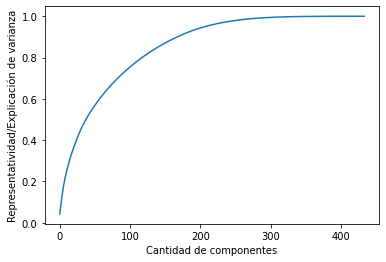

In [ ]:
plt.plot(np.cumsum(pca_p2_full.explained_variance_ratio_))
plt.xlabel("Cantidad de componentes")
plt.ylabel("Representatividad/Explicación de varianza")
plt.show()

# Sintonización de hiperparámetros

## Preprocesamiento con medias

In [ ]:
p1_Xtrain, p1_Xval, p1_ytrain, p1_yval = train_test_split(abundance_xtrain_p1, abundance_ytrain_p1, test_size=0.3, random_state=432)

In [ ]:
param_grid = {
    "pca__n_components": [i for i in range(30, 201, 10)],
    "lr__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

### Cirrosis

In [ ]:
p1_cirr_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_cirr_0 = GridSearchCV(p1_cirr_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_cirr_0.fit(p1_Xtrain, p1_ytrain["Cirrhosis_0"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p1_cirr_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_cirr_1 = GridSearchCV(p1_cirr_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_cirr_1.fit(p1_Xtrain, p1_ytrain["Cirrhosis_1"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Diabetes

In [ ]:
p1_diab_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_diab_0 = GridSearchCV(p1_diab_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_diab_0.fit(p1_Xtrain, p1_ytrain["Diabetes_0"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p1_diab_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_diab_1 = GridSearchCV(p1_diab_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_diab_1.fit(p1_Xtrain, p1_ytrain["Diabetes_1"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Obesidad

In [ ]:
p1_obs_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_obs_0 = GridSearchCV(p1_obs_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_obs_0.fit(p1_Xtrain, p1_ytrain["Obesity_0"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p1_obs_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p1_grid_obs_1 = GridSearchCV(p1_obs_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p1_grid_obs_1.fit(p1_Xtrain, p1_ytrain["Obesity_1"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Resultados

In [ ]:
p1_df = pd.DataFrame(
    [
     [p1_grid_cirr_0.best_score_, p1_grid_cirr_0.best_params_["pca__n_components"], p1_grid_cirr_0.best_params_["lr__C"]],
     [p1_grid_cirr_1.best_score_, p1_grid_cirr_1.best_params_["pca__n_components"], p1_grid_cirr_1.best_params_["lr__C"]],
     [p1_grid_obs_0.best_score_, p1_grid_obs_0.best_params_["pca__n_components"], p1_grid_obs_0.best_params_["lr__C"]],
     [p1_grid_obs_1.best_score_, p1_grid_obs_1.best_params_["pca__n_components"], p1_grid_obs_1.best_params_["lr__C"]],
     [p1_grid_diab_0.best_score_, p1_grid_diab_0.best_params_["pca__n_components"], p1_grid_diab_0.best_params_["lr__C"]],
     [p1_grid_diab_1.best_score_, p1_grid_diab_1.best_params_["pca__n_components"], p1_grid_diab_1.best_params_["lr__C"]],
    ],
    index=pd.Index(['Cirrhosis_0', 'Cirrhosis_1', 'Obesity_0', 'Obesity_1', 'Diabetes_0', 'Diabetes_1']),
    columns=["roc_auc", "n_components", "C"]
)

In [ ]:
p1_df.style

,roc_auc,n_components,C
Cirrhosis_0,0.670052,70,1000.000000
Cirrhosis_1,0.865905,40,100.000000
Obesity_0,0.682686,80,1.000000
Obesity_1,0.748153,30,100.000000
Diabetes_0,0.690155,70,10.000000
Diabetes_1,0.768513,190,0.100000


## Preprocesamiento con medianas

In [ ]:
p2_Xtrain, p2_Xval, p2_ytrain, p2_yval = train_test_split(abundance_xtrain_p2, abundance_ytrain_p2, test_size=0.3, random_state=432)

In [ ]:
param_grid = {
    "pca__n_components": [i for i in range(30, 201, 10)],
    "lr__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

### Cirrosis

In [ ]:
p2_cirr_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_cirr_0 = GridSearchCV(p2_cirr_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_cirr_0.fit(p2_Xtrain, p2_ytrain["Cirrhosis_0"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p2_cirr_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_cirr_1 = GridSearchCV(p2_cirr_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_cirr_1.fit(p2_Xtrain, p2_ytrain["Cirrhosis_1"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Diabetes

In [ ]:
p2_diab_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_diab_0 = GridSearchCV(p2_diab_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_diab_0.fit(p2_Xtrain, p2_ytrain["Diabetes_0"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p2_diab_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_diab_1 = GridSearchCV(p2_diab_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_diab_1.fit(p2_Xtrain, p2_ytrain["Diabetes_1"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Obesidad

In [ ]:
p2_obs_0_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_obs_0 = GridSearchCV(p2_obs_0_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_obs_0.fit(p2_Xtrain, p2_ytrain["Obesity_0"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

In [ ]:
p2_obs_1_grid = Pipeline([
                           ('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('lr', LogisticRegression())
                           ])
p2_grid_obs_1 = GridSearchCV(p2_obs_1_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p2_grid_obs_1.fit(p2_Xtrain, p2_ytrain["Obesity_1"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 40, 50, 60, 70, 80, 90, 100,
                                               110, 120, 130, 140, 150, 160,
                                               170, 180, 190, 200]},
             scoring='roc_auc')

### Resultados

In [ ]:
p2_df = pd.DataFrame(
    [
     [p2_grid_cirr_0.best_score_, p2_grid_cirr_0.best_params_["pca__n_components"], p2_grid_cirr_0.best_params_["lr__C"]],
     [p2_grid_cirr_1.best_score_, p2_grid_cirr_1.best_params_["pca__n_components"], p2_grid_cirr_1.best_params_["lr__C"]],
     [p2_grid_obs_0.best_score_, p2_grid_obs_0.best_params_["pca__n_components"], p2_grid_obs_0.best_params_["lr__C"]],
     [p2_grid_obs_1.best_score_, p2_grid_obs_1.best_params_["pca__n_components"], p2_grid_obs_1.best_params_["lr__C"]],
     [p2_grid_diab_0.best_score_, p2_grid_diab_0.best_params_["pca__n_components"], p2_grid_diab_0.best_params_["lr__C"]],
     [p2_grid_diab_1.best_score_, p2_grid_diab_1.best_params_["pca__n_components"], p2_grid_diab_1.best_params_["lr__C"]],
    ],
    index=pd.Index(['Cirrhosis_0', 'Cirrhosis_1', 'Obesity_0', 'Obesity_1', 'Diabetes_0', 'Diabetes_1']),
    columns=["roc_auc", "n_components", "C"]
)

In [ ]:
p2_df.style

,roc_auc,n_components,C
Cirrhosis_0,0.929024,130,0.010000
Cirrhosis_1,0.949794,140,0.010000
Obesity_0,0.935551,170,0.010000
Obesity_1,0.932695,140,0.010000
Diabetes_0,0.860977,200,0.001000
Diabetes_1,0.853992,90,1.000000


## Preprocesamiento con 0's

In [ ]:
p3_Xtrain, p3_Xval, p3_ytrain, p3_yval = train_test_split(abundance_xtrain_p3, abundance_ytrain_p3, test_size=0.3, random_state=432)

In [ ]:
param_grid = {
    'lsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

### Cirrosis

In [ ]:
p3_cirr_grid = Pipeline([
                            ('scaler', StandardScaler()),
                            ('lsvc', LinearSVC())
                        ])
p3_grid_cirr = GridSearchCV(p3_cirr_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p3_grid_cirr.fit(p3_Xtrain, p3_ytrain["Cirrhosis"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'lsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

### Diabetes

In [ ]:
p3_diab_grid = Pipeline([
                            ('scaler', StandardScaler()),
                            ('lsvc', LinearSVC())
                        ])
p3_grid_diab = GridSearchCV(p3_diab_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p3_grid_diab.fit(p3_Xtrain, p3_ytrain["Diabetes"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'lsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

### Obesidad

In [ ]:
p3_obs_grid = Pipeline([
                            ('scaler', StandardScaler()),
                            ('lsvc', LinearSVC())
                        ])
p3_grid_obs = GridSearchCV(p3_obs_grid, param_grid, n_jobs=-1, scoring="roc_auc")
p3_grid_obs.fit(p3_Xtrain, p3_ytrain["Obesity"])

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'lsvc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

### Resultados

In [ ]:
p3_df = pd.DataFrame(
    [
     [p3_grid_cirr.best_score_, p3_grid_cirr.best_params_["lsvc__C"]],
     [p3_grid_obs.best_score_, p3_grid_obs.best_params_["lsvc__C"]],
     [p3_grid_diab.best_score_, p3_grid_diab.best_params_["lsvc__C"]]
    ],
    index=pd.Index(['Cirrhosis', 'Obesity', 'Diabetes']),
    columns=["roc_auc", "C"]
)

In [ ]:
p3_df.style

,roc_auc,C
Cirrhosis,0.931688,0.001000
Obesity,0.922692,0.001000
Diabetes,0.846030,0.001000


# Validación

## PCA + Logistic Regression

### Preprocesamiento con medias

In [ ]:
p1_Xtrain, p1_Xval, p1_ytrain, p1_yval = train_test_split(abundance_xtrain_p1, abundance_ytrain_p1, test_size=0.3, random_state=432)

#### Cirrosis

In [ ]:
p1_cirr_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_cirr_0.fit(p1_Xtrain, p1_ytrain["Cirrhosis_0"])
p1_cirr_0_p = p1_cirr_0.predict(p1_Xval)

In [ ]:
p1_cirr_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_cirr_1.fit(p1_Xtrain, p1_ytrain["Cirrhosis_1"])
p1_cirr_1_p = p1_cirr_1.predict(p1_Xval)

##### Resultados

In [ ]:
confusion_matrix(p1_yval["Cirrhosis_0"], p1_cirr_0_p)

array([[139,  23],
       [ 13,  12]])

In [ ]:
roc_auc_score(p1_yval["Cirrhosis_0"], p1_cirr_0_p)

0.6690123456790124

In [ ]:
confusion_matrix(p1_yval["Cirrhosis_1"], p1_cirr_1_p)

array([[ 23,   6],
       [ 24, 134]])

In [ ]:
roc_auc_score(p1_yval["Cirrhosis_1"], p1_cirr_1_p)

0.8206023570493235

#### Diabetes

In [ ]:
p1_diab_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_diab_0.fit(p1_Xtrain, p1_ytrain["Diabetes_0"])
p1_diab_0_p = p1_diab_0.predict(p1_Xval)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
p1_diab_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_diab_1.fit(p1_Xtrain, p1_ytrain["Diabetes_1"])
p1_diab_1_p = p1_diab_1.predict(p1_Xval)

##### Resultados

In [ ]:
confusion_matrix(p1_yval["Diabetes_0"], p1_diab_0_p)

array([[118,  33],
       [ 17,  19]])

In [ ]:
roc_auc_score(p1_yval["Diabetes_0"], p1_diab_0_p)

0.6546173657100809

In [ ]:
confusion_matrix(p1_yval["Diabetes_1"], p1_diab_1_p)

array([[ 15,  20],
       [ 31, 121]])

In [ ]:
roc_auc_score(p1_yval["Diabetes_1"], p1_diab_1_p)

0.612312030075188

#### Obesidad

In [ ]:
p1_obs_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_obs_0.fit(p1_Xtrain, p1_ytrain["Obesity_0"])
p1_obs_0_p = p1_obs_0.predict(p1_Xval)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
p1_obs_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=166, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p1_obs_1.fit(p1_Xtrain, p1_ytrain["Obesity_1"])
p1_obs_1_p = p1_obs_1.predict(p1_Xval)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### Resultados

In [ ]:
confusion_matrix(p1_yval["Obesity_0"], p1_obs_0_p)

array([[108,  37],
       [ 17,  25]])

In [ ]:
roc_auc_score(p1_yval["Obesity_0"], p1_obs_0_p)

0.6700328407224959

In [ ]:
confusion_matrix(p1_yval["Obesity_1"], p1_obs_1_p)

array([[  5,  15],
       [ 26, 141]])

In [ ]:
roc_auc_score(p1_yval["Obesity_1"], p1_obs_1_p)

0.5471556886227544

### Preprocesamiento con medianas

In [ ]:
p2_Xtrain, p2_Xval, p2_ytrain, p2_yval = train_test_split(abundance_xtrain_p2, abundance_ytrain_p2, test_size=0.3, random_state=432)

#### Cirrosis

In [ ]:
p2_cirr_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_cirr_0.fit(p2_Xtrain, p2_ytrain["Cirrhosis_0"])
p2_cirr_0_p = p2_cirr_0.predict(p2_Xval)

In [ ]:
p2_cirr_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_cirr_1.fit(p2_Xtrain, p2_ytrain["Cirrhosis_1"])
p2_cirr_1_p = p2_cirr_1.predict(p2_Xval)

##### Resultados

In [ ]:
confusion_matrix(p2_yval["Cirrhosis_0"], p2_cirr_0_p)

array([[156,   6],
       [ 10,  15]])

In [ ]:
roc_auc_score(p2_yval["Cirrhosis_0"], p2_cirr_0_p)

0.7814814814814816

In [ ]:
confusion_matrix(p2_yval["Cirrhosis_1"], p2_cirr_1_p)

array([[ 21,   8],
       [  7, 151]])

In [ ]:
roc_auc_score(p2_yval["Cirrhosis_1"], p2_cirr_1_p)

0.8399170667830641

#### Diabetes

In [ ]:
p2_diab_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_diab_0.fit(p2_Xtrain, p2_ytrain["Diabetes_0"])
p2_diab_0_p = p2_diab_0.predict(p2_Xval)

In [ ]:
p2_diab_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_diab_1.fit(p2_Xtrain, p2_ytrain["Diabetes_1"])
p2_diab_1_p = p2_diab_1.predict(p2_Xval)

##### Resultados

In [ ]:
confusion_matrix(p2_yval["Diabetes_0"], p2_diab_0_p)

array([[134,  17],
       [ 18,  18]])

In [ ]:
roc_auc_score(p2_yval["Diabetes_0"], p2_diab_0_p)

0.6937086092715231

In [ ]:
confusion_matrix(p2_yval["Diabetes_1"], p2_diab_1_p)

array([[ 18,  17],
       [ 20, 132]])

In [ ]:
roc_auc_score(p2_yval["Diabetes_1"], p2_diab_1_p)

0.6913533834586466

#### Obesidad

In [ ]:
p2_obs_0 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_obs_0.fit(p2_Xtrain, p2_ytrain["Obesity_0"])
p2_obs_0_p = p2_obs_0.predict(p2_Xval)

In [ ]:
p2_obs_1 = Pipeline([
                   ('scaler', StandardScaler()),
                   ('pca', PCA(n_components=169, random_state=432)),
                   ('lr', LogisticRegression(random_state=432))
                   ])
p2_obs_1.fit(p2_Xtrain, p2_ytrain["Obesity_1"])
p2_obs_1_p = p2_obs_1.predict(p2_Xval)

##### Resultados

In [ ]:
confusion_matrix(p2_yval["Obesity_0"], p2_obs_0_p)

array([[125,  20],
       [ 15,  27]])

In [ ]:
roc_auc_score(p2_yval["Obesity_0"], p2_obs_0_p)

0.752463054187192

In [ ]:
confusion_matrix(p2_yval["Obesity_1"], p2_obs_1_p)

array([[  9,  11],
       [  6, 161]])

In [ ]:
roc_auc_score(p2_yval["Obesity_1"], p2_obs_1_p)

0.7070359281437126

## Linear SVC

In [ ]:
p3_Xtrain, p3_Xval, p3_ytrain, p3_yval = train_test_split(abundance_xtrain_p3, abundance_ytrain_p3, test_size=0.3, random_state=432)

### Preprocesamiento con 0's

#### Cirrosis

In [ ]:
p3_cirr = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC())
                    ])
p3_cirr.fit(p3_Xtrain, p3_ytrain["Cirrhosis"])
p3_cirr_p = p3_cirr.predict(p3_Xval)

In [ ]:
confusion_matrix(p3_yval["Cirrhosis"], p3_cirr_p)

array([[138,  24],
       [  8,  17]])

In [ ]:
roc_auc_score(p3_yval["Cirrhosis"], p3_cirr_p)

0.765925925925926

#### Obesidad

In [ ]:
p3_obs = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC())
                    ])
p3_obs.fit(p3_Xtrain, p3_ytrain["Obesity"])
p3_obs_p = p3_obs.predict(p3_Xval)

In [ ]:
confusion_matrix(p3_yval["Obesity"], p3_obs_p)

array([[113,  32],
       [ 12,  30]])

In [ ]:
roc_auc_score(p3_yval["Obesity"], p3_obs_p)

0.7467980295566503

#### Diabetes

In [ ]:
p3_diab = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC())
                    ])
p3_diab.fit(p3_Xtrain, p3_ytrain["Diabetes"])
p3_diab_p = p3_diab.predict(p3_Xval)

In [ ]:
confusion_matrix(p3_yval["Diabetes"], p3_diab_p)

array([[119,  32],
       [ 14,  22]])

In [ ]:
roc_auc_score(p3_yval["Diabetes"], p3_diab_p)

0.6995952906548933

# Submit

## Submit para medianas
Cirrosis 1
Diabetes 0
Obesidad 1

In [ ]:
ids = abundance_test_p2[["Unnamed: 0"]]
abundance_test_p2 = abundance_test_p2.drop(["Unnamed: 0"], axis=1)

In [ ]:
median_cirr = Pipeline([
                        ("scaler", StandardScaler()),
                        ("pca", PCA(n_components=130)),
                        ("lr", LogisticRegression(C=0.774264))
                        ])
median_obs  = Pipeline([
                        ("scaler", StandardScaler()),
                        ("pca", PCA(n_components=170)),
                        ("lr", LogisticRegression(C=0.021544))
                        ])
median_diab  = Pipeline([
                        ("scaler", StandardScaler()),
                        ("pca", PCA(n_components=200)),
                        ("lr", LogisticRegression(C=0.003594))
                        ])

In [ ]:
median_cirr.fit(abundance_xtrain_p2, abundance_ytrain_p2["Cirrhosis_1"])
median_obs.fit(abundance_xtrain_p2, abundance_ytrain_p2["Obesity_1"])
median_diab.fit(abundance_xtrain_p2, abundance_ytrain_p2["Diabetes_0"])

p2_cirr_p = median_cirr.predict(abundance_test_p2)
p2_obs_p = median_obs.predict(abundance_test_p2)
p2_diab_p = median_diab.predict(abundance_test_p2)

In [ ]:
# Id,Cirrhosis,Obesity,Diabetes
df = pd.DataFrame({
        "Id": ids["Unnamed: 0"],
        "Cirrhosis": p2_cirr_p,
        "Obesity": p2_obs_p,
        "Diabetes": p2_diab_p
    })

## Submit nulos a 0's

In [ ]:
ids = abundance_test_p3[["Unnamed: 0"]]
abundance_test_p3 = abundance_test_p3.drop(["Unnamed: 0"], axis=1)

In [ ]:
p3_pipe_cirr = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC(C=0.001000))
                    ])
p3_pipe_obs = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC(C=0.001000))
                    ])
p3_pipe_diab = Pipeline([
                    ('scaler', StandardScaler()),
                    ('svc', LinearSVC(C=0.001000))
                    ])

In [ ]:
p3_pipe_cirr.fit(abundance_xtrain_p3, abundance_ytrain_p3["Cirrhosis"])
p3_pipe_obs.fit(abundance_xtrain_p3, abundance_ytrain_p3["Obesity"])
p3_pipe_diab.fit(abundance_xtrain_p3, abundance_ytrain_p3["Diabetes"])

p3_cirr_p = p3_pipe_cirr.predict(abundance_test_p3)
p3_obs_p = p3_pipe_obs.predict(abundance_test_p3)
p3_diab_p = p3_pipe_diab.predict(abundance_test_p3)

In [ ]:
# Id,Cirrhosis,Obesity,Diabetes
df = pd.DataFrame({
        "Id": ids["Unnamed: 0"],
        "Cirrhosis": p3_cirr_p,
        "Obesity": p3_obs_p,
        "Diabetes": p3_diab_p
    })

## Archivo a CSV

In [ ]:
df.to_csv("rakim_ken-y_don-omar_4.csv", index=False)